## Change to the Correct Directory

In [1]:
import os

# List all directories and files in the current working directory
print(os.listdir())

## Step 1: Load Datasets
 Begin with .CSV files for SQL Queries

In [2]:
import pandas as pd

# List all CSV files in the directory
csv_files = [f for f in os.listdir() if f.endswith('.csv')]

# Load CSV files into a list of DataFrames
data_frames = [pd.read_csv(file) for file in csv_files]

# Optionally, combine them into one DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)
print(combined_df.head())


   RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0    102001         0    United States    country       NaN  2024-12-31   
1    394913         1     New York, NY        msa        NY  2024-12-31   
2    753899         2  Los Angeles, CA        msa        CA  2024-12-31   
3    394463         3      Chicago, IL        msa        IL  2024-12-31   
4    394514         4       Dallas, TX        msa        TX  2024-12-31   

   2025-01-31  2025-03-31  2025-12-31  2018-01-31  ...  2007-04-30  \
0         0.3         1.1         3.2         NaN  ...         NaN   
1         0.3         0.7         1.6         NaN  ...         NaN   
2         0.1        -0.1         1.8         NaN  ...         NaN   
3         0.4         1.3         2.3         NaN  ...         NaN   
4        -0.1        -0.1         1.7         NaN  ...         NaN   

   2007-05-31  2007-06-30  2007-07-31  2007-08-31  2007-09-30  2007-10-31  \
0         NaN         NaN         NaN         NaN  

## Step 2: Data Structure

The loan application and origination data typically contains the following columns:

- **`year`**: The year of the loan application (2008-2023).
- **`race_ethnicity`**: The racial or ethnic group of the applicant (e.g., White, Black, Asian, Hispanic, etc.).
- **`loan_type`**: The type of loan applied for (e.g., Conventional, Non-Conventional).
- **`loan_amount`**: The loan amount requested or originated.
- **`loan_approved`**: Whether the loan was approved or not (binary).
- **`loan_denied`**: Whether the loan was denied or not (binary).
- **`denial_reason`**: The reason for loan denial (e.g., High Debt-to-Income, Credit History, etc.).
- **`high_cost_loan`**: Indicates whether the loan was high-cost, based on certain criteria like interest rate or fees.
  
These columns will allow us to analyze various aspects of loan origination and denial patterns, including disparities in access to home loans by race and ethnicity, the types of loans requested, and the reasons behind loan denials.

### Example of the Data:

| year | race_ethnicity | loan_type      | loan_amount | loan_approved  | loan_denied  | denial_reason          | high_cost_loan |
|------|----------------|----------------|-------------|----------------|-------------|------------------------|-----------------|
| 2023 | White          | Conventional   | 250000      | 1              | 0           | N/A                    | 0               |
| 2023 | Black          | Non-Conventional | 200000      | 0            | 1           | High Debt-to-Income    | 1               |
| 2022 | Hispanic       | Conventional   | 300000      | 1              | 0           | N/A                    | 0               |
| 2021 | Asian          | Non-Conventional | 350000      | 0            | 1           | Credit History         | 0               |

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

## Load Dataset

In [4]:
import zipfile
import os

# Function to extract all ZIP files in a folder
def extract_all_zips_in_folder(folder_path):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith('.zip'):  # Check if the file is a ZIP file
            zip_file_path = os.path.join(folder_path, filename)  # Get the full path of the ZIP file
            extract_dir = os.path.join(folder_path, filename[:-4])  # Create a folder to extract to, removing '.zip' from the name
            
            # Create the directory to extract the files to
            os.makedirs(extract_dir, exist_ok=True)

            # Extract the ZIP file
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                zip_ref.extractall(extract_dir)  # Extract all contents of the ZIP file to the specified directory

            print(f"Extracted {filename} to {extract_dir}")

# Example usage
folder_path = '/Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A'  # The folder containing your ZIP files
extract_all_zips_in_folder(folder_path)

Extracted 2010_SFNationalFileA2010.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2010_SFNationalFileA2010
Extracted 2014_SFNationalFileA2014.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2014_SFNationalFileA2014
Extracted 2023_SFNationalFileA2023.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2023_SFNationalFileA2023
Extracted 2019_SFNationalFileA2019.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2019_SFNationalFileA2019
Extracted 2020_SFNationalFileA2020.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2020_SFNationalFileA2020
Extracted 2013_SFNationalFileA2013.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2013_SFNationalFileA2013
Extracted 2017_SFNationalFileA2017.zip to /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2017_SFNationalFileA2017
Extracted 2009_SFNationalFileA2009.zip to /Users

## Step 3: Load Data 
### 3.1 TXT Processing : Prepare function to load **'text'** data
#### Overview
The script opens and reads the content of `.txt` files line by line, ensuring all the text data is extracted for analysis. Make sure `PyDF2` is installed prior to importing `PdfReader`

In [5]:
!pip install PyPDF2
from PyPDF2 import PdfReader

#Define base directory

base_dir = "/Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/"

# Loop through all extracted folders
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    
    # Only process directories
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")
        
        # Loop through files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            # Process text files
            if file.endswith(".txt"):
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    print(f"Text content from {file}:\n{content[:500]}...\n")  # Print the first 500 characters

            # Process PDF files
            elif file.endswith(".pdf"):
                reader = PdfReader(file_path)
                pdf_text = ""
                for page in reader.pages:
                    pdf_text += page.extract_text()
                print(f"PDF content from {file}:\n{pdf_text[:500]}...\n")  # Print the first 500 characters



Processing folder: /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2023_SFNationalFileA2023
PDF content from 2023_Single_Family_National_File_A.pdf:
 
 
 
Enterprise Public Use Data base Data Dictionary 
 
 
 
Single -Family Properties  
 NATIONAL FILE A  
 
 
Release of 2023 Data  
 
 
 
 
 
 
 
 
Federal Housing Finance Agency   Page 1 
 
Enterprise Public Use Database 
Single -Family Properties  
National File A  
 
RELEASE OF 20 23 DATA  
 
 
  The “National File A” contains mortgage-level data on owner -occupied 1 -unit properties.   Data are available at https://www.fhfa.gov/pudbdata . 
Note:  Fields are separated by one blank space.  ...

Text content from fnma_sf2023a_loans.txt:
1       1 1 3 2 3 2 8 4 5 9 2 9 1 4
1       2 1 1 3 2 3 1 4 5 9 1 9 1 4
1       3 1 3 2 3 2 8 4 5 5 1 2 1 4
1       4 1 2 3 3 1 1 4 5 5 1 2 1 4
1       5 0 1 2 3 5 1 4 5 5 2 1 1 4
1       6 0 2 2 3 1 8 4 5 9 1 9 1 4
1       7 1 2 3 3 2 1 4 5 5 2 1 1 4
1       8 1 3 1 2 2 1 4 9 9 3 9

PDF content from 2018_Single_Family_National_File_A.pdf:
 
 
 
Enterprise Public Use Data base Data Dictionary 
 
 
 
Single -Family Properties  
 NATIONAL FILE A  
 
 
Release of 2018 Data  
 
 
 
 
 
 
 
 
Federal Housing Finance Agency   Page 1 
 
Enterprise Public Use Database 
Single -Family Properties  
National File A  
 
RELEASE OF 201 8 DATA  
 
 
  The “National File A” contains mortgage-level data on owner -occupied 1 -unit properties.  
Note:  Fields are separated by one blank space.  
 
 
Field #   
Field Width   
Field Name   
Values   
...

Processing folder: /Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2017_SFNationalFileA2017
Text content from fhlmc_sf2017a_loans.txt:
2       1 1 3 3 3 1 8 4 5 9 2 5 1 4
2       2 1 3 2 3 2 8 4 5 9 1 5 1 4
2       3 1 1 3 3 1 8 4 5 9 1 5 1 4
2       4 0 1 3 2 2 8 4 5 9 2 5 1 4
2       5 1 2 2 2 2 8 4 5 9 1 5 1 4
2       6 1 3 3 3 2 8 4 5 9 2 5 1 4
2       7 1 2 3 3 1 8 4 5 5 1 2 1 4
2       8 1 2 3 3 2 1 4 2 2 1 

Text content from fnma_sf2021a_loans.txt:
1       1 1 2 3 3 3 8 4 6 9 1 9 1 4
1       2 1 3 3 3 4 1 4 7 7 1 2 1 4
1       3 1 3 3 3 1 8 4 9 9 9 9 1 4
1       4 1 2 3 3 2 8 4 5 9 1 9 1 4
1       5 1 1 2 2 3 1 4 5 9 2 9 1 4
1       6 1 1 2 3 1 8 4 9 9 9 9 1 4
1       7 1 1 2 3 1 8 4 5 9 1 9 1 4
1       8 1 2 3 3 1 8 4 9 9 1 2 1 4
1       9 1 3 2 3 2 8 4 7 9 1 9 1 4
1      10 1 2 2 3 2 8 4 2 2 1 2 1 4
1      11 1 2 3 3 1 8 4 5 5 1 2 1 4
1      12 1 1 3 3 2 1 4 5 5 1 2 1 4
1      13 1 2 3 3 2 8 4 5 5 1 2 1 4
1      14 1 2 3 3 1 8 4 9 9 3 3 ...

Text content from fhlmc_sf2021a_loans.txt:
2       1 1 2 2 3 2 1 4 5 9 2 5 1 4
2       2 1 3 1 3 1 1 4 5 7 1 2 1 4
2       3 1 1 2 3 2 1 4 5 9 1 5 1 4
2       4 1 3 1 3 1 8 4 9 9 1 2 1 4
2       5 1 2 2 2 1 8 4 5 9 1 5 1 4
2       6 1 2 2 1 2 8 4 5 9 2 5 1 3
2       7 1 2 2 3 1 8 4 5 5 1 1 1 4
2       8 1 2 3 2 2 8 4 9 9 3 3 1 4
2       9 1 1 3 3 3 1 4 5 5 2 1 1 4
2      10 1 2 3 3 2 1 4 5 5 1 2 1 4
2      11 1 3 3 3 2 8 4 9 9 3 3 1 4
2      12 1 1 

Text content from fhlmc_sf2013a_loans.txt:
2       1 0 1 2 3 2 8 4 5 5 1 2 1 4
2       2 1 1 2 2 1 8 4 5 5 1 2 1 4
2       3 1 3 3 3 2 8 4 5 5 1 2 1 4
2       4 1 2 3 3 1 8 4 5 5 1 2 1 4
2       5 1 2 3 3 1 8 4 5 5 1 2 1 4
2       6 0 1 3 3 2 8 4 5 9 2 5 1 4
2       7 1 3 3 3 2 1 4 2 9 1 5 1 4
2       8 0 1 2 3 2 8 4 5 5 1 2 1 4
2       9 1 1 3 3 2 8 4 5 5 1 2 1 4
2      10 1 2 3 1 1 8 4 5 9 2 5 1 3
2      11 1 2 3 3 3 8 4 5 5 1 2 1 4
2      12 1 3 3 3 4 8 4 5 5 2 1 1 4
2      13 1 3 2 3 2 8 4 7 7 1 2 1 4
2      14 0 1 2 1 1 8 4 5 9 1 5 ...

Text content from fnma_sf2013a_loans.txt:
1       1 1 3 2 2 2 8 4 5 9 2 4 1 4
1       2 1 2 3 3 3 8 4 5 9 2 1 1 4
1       3 1 2 2 2 2 8 4 5 9 2 4 1 4
1       4 0 2 3 3 1 1 4 5 9 1 4 1 4
1       5 1 3 3 3 2 1 4 5 9 2 4 1 4
1       6 1 3 3 3 1 8 4 7 7 1 2 1 4
1       7 1 2 3 2 2 8 4 5 9 1 4 1 4
1       8 1 3 3 3 2 8 4 2 2 1 2 1 4
1       9 1 2 2 3 2 1 4 9 9 3 3 1 4
1      10 1 3 2 3 1 8 4 5 5 1 2 1 4
1      11 1 1 3 3 5 8 4 5 9 2 4 1 4
1      12 0 1 

### 3.2 PDF Processing : Prepare function to load **'pdf'** Data

#### Overview
This script extracts text from `.pdf` files using the `PyPDF2` library. It includes error handling to manage cases where a PDF cannot be read due to corruption or other issues.

   ## Decipher and Sparse the `.txt`  using the Data Dictionary from `pdf` file

In [6]:
# Inspecting the raw content of the text file
with open("/Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2008_SFNationalFileA2008 (1)/fhlmc_sf2008a_loans.txt", "r") as file:
    lines = file.readlines()

# Show the first few lines to verify the content
lines[:5]

['2       1 1 2 3 3 2 1 4 5 5 1 2 1 9 2\n',
 '2       2 1 2 2 1 1 1 4 5 9 2 5 1 3 1\n',
 '2       3 1 3 1 1 3 8 4 3 9 2 5 1 2 1\n',
 '2       4 1 2 2 3 1 8 4 9 9 2 5 1 9 2\n',
 '2       5 1 2 2 3 2 8 4 9 9 1 5 1 9 2\n']

In [7]:
file_path = "/Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2008_SFNationalFileA2008 (1)/fnma_sf2008a_loans.txt"
# Load the file into a pandas dataframe (with whitespace delimiter)
df_2008_mae = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Display the first few rows of the dataframe
df_2008_mae.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,1,1,3,3,2,8,4,5,5,1,2,1,4,2
1,1,2,1,3,3,1,2,8,4,9,9,2,4,1,3,2
2,1,3,1,1,1,3,2,8,4,5,5,1,2,1,4,1
3,1,4,1,2,2,3,1,8,4,5,5,1,2,1,4,2
4,1,5,1,2,2,3,2,8,4,5,9,1,2,1,4,2


In [8]:
file_path = "/Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2008_SFNationalFileA2008 (1)/fhlmc_sf2008a_loans.txt"

# Load the file into a pandas dataframe (with whitespace delimiter)
df_2008_mac = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Display the first few rows of the dataframe
df_2008_mac.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,1,1,2,3,3,2,1,4,5,5,1,2,1,9,2
1,2,2,1,2,2,1,1,1,4,5,9,2,5,1,3,1
2,2,3,1,3,1,1,3,8,4,3,9,2,5,1,2,1
3,2,4,1,2,2,3,1,8,4,9,9,2,5,1,9,2
4,2,5,1,2,2,3,2,8,4,9,9,1,5,1,9,2


In [9]:
from PyPDF2 import PdfReader

# Define the path to the PDF file
pdf_file_path = "/Users/pandew/Housing Inequity Project 2024/Single-Family Mortgage A/2008_SFNationalFileA2008 (1)/Single_Family_National_File_A.pdf"

# Read the PDF
reader = PdfReader(pdf_file_path)
pdf_text = ""

# Extract text from each page
for page in reader.pages:
    pdf_text += page.extract_text()

# Display the first 500 characters of the text
print(pdf_text[:500])

 
  
Enterprise Public Use Database Data Dictionary 
   
Single-Family Properties 
 
NATIONAL FILE A 
 
 
 
Release of 2008 Data 
       
Federal Housing Finance Agency  Page 1 
 
Enterprise Public Use Database 
Single-Family Properties 
National File A 
 
RELEASE OF 2008 DATA  
 
 
  The “National File A” contains mortgage-level data on owner-occupied 1-unit properties. 
Note:  Fields are separated by one blank space. 
 
 
Field #   
Field Width  
Field Name  
Values  
Description / Comments 
 


In [10]:
# Example Mappings from the Data Dictionary

field_mappings = {
    'EnterpriseFlag': {
        1: 'Fannie Mae',
        2: 'Freddie Mac'
    },
    'MSA_Code': {
        1: 'Metropolitan Area',
        0: 'Non-Metropolitan Area'
    },
    'CensusTractPercentMinority': {
        1: '0 - <10%',
        2: '10 - <30%',
        3: '30 - 100%',
        9: 'Missing'
    },
    'TractIncomeRatio': {
        1: '0 - 80%',
        2: '>80 - 120%',
        3: '>120%',
        9: 'Missing'
    },
    'BorrowerIncomeRatio': {
        1: '0 - 60%',
        2: '>60 - 100%',
        3: '>100%',
        9: 'Not applicable'
    },
    'LTV_Ratio': {
        1: '> 0 - <=60%',
        2: '>60 - <=80%',
        3: '>80 - <=90%',
        4: '>90 - <=95%',
        5: '>95%',
        9: 'Missing'
    },
    'PurposeOfLoan': {
        1: 'Purchase',
        8: 'Other',
        9: 'Not applicable/not available'
    },
    'FederalGuarantee': {
        1: 'FHA/VA',
        2: 'Rural Housing Service (RHS)',
        3: 'Home Equity Conversion Mortgage (HECM)',
        4: 'No Federal guarantee (Conventional)',
        5: 'Title 1 – FHA'
    },
    'BorrowerRaceEthnicity': {
        1: 'American Indian or Alaska Native',
        2: 'Asian',
        3: 'Black or African American',
        4: 'Native Hawaiian or Other Pacific Islander',
        5: 'White',
        6: 'Two or more races',
        7: 'Hispanic or Latino',
        9: 'Not available/not applicable'
    },
    'CoBorrowerRaceEthnicity': {
        1: 'American Indian or Alaska Native',
        2: 'Asian',
        3: 'Black or African American',
        4: 'Native Hawaiian or Other Pacific Islander',
        5: 'White',
        6: 'Two or more races',
        7: 'Hispanic or Latino',
        9: 'Not available/not applicable'
    },
    'BorrowerGender': {
        1: 'Male',
        2: 'Female',
        3: 'Not provided by the borrower',
        4: 'Not applicable',
        9: 'Missing'
    },
    'CoBorrowerGender': {
        1: 'Male',
        2: 'Female',
        3: 'Not provided by the co-borrower',
        4: 'Not applicable',
        9: 'Missing'
    },
    'UnitAffordabilityCategory': {
        1: 'Low-income family in a low-income area',
        2: 'Very low-income family in a low-income area',
        3: 'Very low-income family not in a low-income area',
        4: 'Other',
        9: 'Not available',
        0: 'Missing'
    },
    'UnderservedAreasIndicator': {
        1: 'Yes',
        2: 'No',
        9: 'Not Applicable'
    }
}

In [11]:
# Define column names based on the data dictionary
column_names = [
    'EnterpriseFlag', 'RecordNumber', 'MSA_Code', 'CensusTractPercentMinority',
    'TractIncomeRatio', 'BorrowerIncomeRatio', 'LTV_Ratio', 'PurposeOfLoan',
    'FederalGuarantee', 'BorrowerRaceEthnicity', 'CoBorrowerRaceEthnicity',
    'BorrowerGender', 'CoBorrowerGender', 'NumberOfUnits', 'UnitAffordabilityCategory', 'UnderservedAreasIndicator'
]

# Assign the column names to your DataFrame
df_2008_mac.columns = column_names

# Create a function to map numeric values to descriptions
def map_values_to_description(df, field_name, field_mapping):
    df[field_name] = df[field_name].map(field_mapping)
    return df

# Example mapping for 'EnterpriseFlag' field
enterprise_flag_mapping = {
    1: 'Fannie Mae',
    2: 'Freddie Mac'
}

# Map each field with their respective mapping dictionaries
df_2008_mac = map_values_to_description(df_2008_mac, 'EnterpriseFlag', enterprise_flag_mapping)

# Similarly, map other fields using their respective mappings
msa_code_mapping = {
    1: 'metropolitan area',
    0: 'non-metropolitan area'
}

df_2008_mac = map_values_to_description(df_2008_mac, 'MSA_Code', msa_code_mapping)

censustractpercentminority_mapping = {
        1: '0 - <10%',
        2: '10 - <30%',
        3: '30 - 100%',
        9: 'Missing'
    }
df_2008_mac = map_values_to_description(df_2008_mac, 'CensusTractPercentMinority', censustractpercentminority_mapping)

# Example for a few other mappings
tractincomeratio_mapping = {
        1: '0 - 80%',
        2: '>80 - 120%',
        3: '>120%',
        9: 'Missing'
    }
df_2008_mac = map_values_to_description(df_2008_mac, 'TractIncomeRatio', tractincomeratio_mapping)

borrowerincomeratio_mapping= {
        1: '0 - 60%',
        2: '>60 - 100%',
        3: '>100%',
        9: 'Not applicable'
    }
df_2008_mac = map_values_to_description(df_2008_mac,  'BorrowerIncomeRatio',  borrowerincomeratio_mapping)


ltvratio_mapping= {
        1: '> 0 - <=60%',
        2: '>60 - <=80%',
        3: '>80 - <=90%',
        4: '>90 - <=95%',
        5: '>95%',
        9: 'Missing'
    }
df_2008_mac = map_values_to_description(df_2008_mac,  'LTV_Ratio',  ltvratio_mapping)

purposeofloan_mapping= {
        1: 'Purchase',
        8: 'Other',
        9: 'Not applicable/not available'
    }
df_2008_mac = map_values_to_description(df_2008_mac,'PurposeOfLoan', purposeofloan_mapping)
 
        
        
federalguantee_mapping= {
        1: 'FHA/VA',
        2: 'Rural Housing Service (RHS)',
        3: 'Home Equity Conversion Mortgage (HECM)',
        4: 'No Federal guarantee (Conventional)',
        5: 'Title 1 – FHA'
    }
df_2008_mac = map_values_to_description(df_2008_mac,'FederalGuarantee', federalguantee_mapping)
 
borrowerraceethnicity_mapping= {
        1: 'American Indian or Alaska Native',
        2: 'Asian',
        3: 'Black or African American',
        4: 'Native Hawaiian or Other Pacific Islander',
        5: 'White',
        6: 'Two or more races',
        7: 'Hispanic or Latino',
        9: 'Not available/not applicable'
    }
df_2008_mac = map_values_to_description(df_2008_mac,'BorrowerRaceEthnicity', borrowerraceethnicity_mapping)
        
coborrowerraceethnicity_mapping= {
        1: 'American Indian or Alaska Native',
        2: 'Asian',
        3: 'Black or African American',
        4: 'Native Hawaiian or Other Pacific Islander',
        5: 'White',
        6: 'Two or more races',
        7: 'Hispanic or Latino',
        9: 'Not available/not applicable'
    }
df_2008_mac = map_values_to_description(df_2008_mac,'CoBorrowerRaceEthnicity', coborrowerraceethnicity_mapping)
    
borrowergender_mapping= {
        1: 'Male',
        2: 'Female',
        3: 'Not provided by the borrower',
        4: 'Not applicable',
        9: 'Missing'
    }
df_2008_mac = map_values_to_description(df_2008_mac,'BorrowerGender', borrowergender_mapping)
         
coborrowergender_mapping= {
        1: 'Male',
        2: 'Female',
        3: 'Not provided by the co-borrower',
        4: 'Not applicable',
        9: 'Missing'
    }
df_2008_mac = map_values_to_description(df_2008_mac,'CoBorrowerGender', coborrowergender_mapping)
        
unitaffordabilitycategory_mapping= {
        1: 'Low-income family in a low-income area',
        2: 'Very low-income family in a low-income area',
        3: 'Very low-income family not in a low-income area',
        4: 'Other',
        9: 'Not available',
        0: 'Missing'
    }

df_2008_mac = map_values_to_description(df_2008_mac,'UnitAffordabilityCategory', unitaffordabilitycategory_mapping)
       
underservedareasindicator_mapping= {
        1: 'Yes',
        2: 'No',
        9: 'Not Applicable'
    }
df_2008_mac = map_values_to_description(df_2008_mac, 'UnderservedAreasIndicator', underservedareasindicator_mapping)

# Repeat similar steps for other columns using their appropriate mappings
# Let's say you're updating 'BorrowerRaceEthnicity', 'BorrowerGender', etc.



# Check the output
df_2008_mac.head()  # Show the first few rows of the decoded DataFrame

df_2008_mac

,EnterpriseFlag,RecordNumber,MSA_Code,CensusTractPercentMinority,TractIncomeRatio,BorrowerIncomeRatio,LTV_Ratio,PurposeOfLoan,FederalGuarantee,BorrowerRaceEthnicity,CoBorrowerRaceEthnicity,BorrowerGender,CoBorrowerGender,NumberOfUnits,UnitAffordabilityCategory,UnderservedAreasIndicator
0,Freddie Mac,1,metropolitan area,10 - <30%,>120%,>100%,>60 - <=80%,Purchase,No Federal guarantee (Conventional),White,White,Male,Female,1,Not available,No
1,Freddie Mac,2,metropolitan area,10 - <30%,>80 - 120%,0 - 60%,> 0 - <=60%,Purchase,No Federal guarantee (Conventional),White,Not available/not applicable,Female,NaN,1,Very low-income family not in a low-income area,Yes
2,Freddie Mac,3,metropolitan area,30 - 100%,0 - 80%,0 - 60%,>80 - <=90%,Other,No Federal guarantee (Conventional),Black or African American,Not available/not applicable,Female,NaN,1,Very low-income family in a low-income area,Yes
3,Freddie Mac,4,metropolitan area,10 - <30%,>80 - 120%,>100%,> 0 - <=60%,Other,No Federal guarantee (Conventional),Not available/not applicable,Not available/not applicable,Female,NaN,1,Not available,No
4,Freddie Mac,5,metropolitan area,10 - <30%,>80 - 120%,>100%,>60 - <=80%,Other,No Federal guarantee (Conventional),Not available/not applicable,Not available/not applicable,Male,NaN,1,Not available,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716224,Freddie Mac,1716225,non-metropolitan area,0 - <10%,>80 - 120%,>100%,>60 - <=80%,Purchase,No Federal guarantee (Conventional),White,White,Male,Female,1,Not available,No
1716225,Freddie Mac,1716226,metropolitan area,0 - <10%,>120%,>100%,>60 - <=80%,Purchase,No Federal guarantee (Conventional),White,Not available/not applicable,Male,NaN,1,Not available,No
1716226,Freddie Mac,1716227,metropolitan area,0 - <10%,>120%,>100%,> 0 - <=60%,Other,No Federal guarantee (Conventional),White,White,Female,Male,1,Not available,No
1716227,Freddie Mac,1716228,metropolitan area,10 - <30%,>80 - 120%,>60 - 100%,>60 - <=80%,Purchase,No Federal guarantee (Conventional),Not available/not applicable,Not available/not applicable,Not provided by the borrower,Not provided by the co-borrower,1,Not available,No


### YAY! We've Deciphered the `txt` for `Freddie Mac`

  Now lets do the same for `Fannie Mae`

In [12]:
# Set column names for df_2008_mae
df_2008_mae.columns = [
    'EnterpriseFlag', 'RecordNumber', 'MSA_Code', 'CensusTractPercentMinority',
    'TractIncomeRatio', 'BorrowerIncomeRatio', 'LTV_Ratio', 'PurposeOfLoan',
    'FederalGuarantee', 'BorrowerRaceEthnicity', 'CoBorrowerRaceEthnicity',
    'BorrowerGender', 'CoBorrowerGender', 'NumberOfUnits', 'UnitAffordabilityCategory', 'UnderservedAreasIndicator'
]


In [13]:
# Assign column names based on the data dictionary
df_2008_mae.columns = column_names

# Create a function to map numeric values to descriptions
def map_values_to_description(df, field_name, field_mapping):
    df[field_name] = df[field_name].map(field_mapping)
    return df

# Map fields for 'df_2008_mae' using the same mappings as for 'df_2008_mac'

# Mapping for 'EnterpriseFlag'
df_2008_mae = map_values_to_description(df_2008_mae, 'EnterpriseFlag', enterprise_flag_mapping)

# Mapping for 'MSA_Code'
df_2008_mae = map_values_to_description(df_2008_mae, 'MSA_Code', msa_code_mapping)

# Mapping for 'CensusTractPercentMinority'
df_2008_mae = map_values_to_description(df_2008_mae, 'CensusTractPercentMinority', censustractpercentminority_mapping)

# Mapping for 'TractIncomeRatio'
df_2008_mae = map_values_to_description(df_2008_mae, 'TractIncomeRatio', tractincomeratio_mapping)

# Mapping for 'BorrowerIncomeRatio'
df_2008_mae = map_values_to_description(df_2008_mae, 'BorrowerIncomeRatio', borrowerincomeratio_mapping)

# Mapping for 'LTV_Ratio'
df_2008_mae = map_values_to_description(df_2008_mae, 'LTV_Ratio', ltvratio_mapping)

# Mapping for 'PurposeOfLoan'
df_2008_mae = map_values_to_description(df_2008_mae, 'PurposeOfLoan', purposeofloan_mapping)

# Mapping for 'FederalGuarantee'
df_2008_mae = map_values_to_description(df_2008_mae, 'FederalGuarantee', federalguantee_mapping)

# Mapping for 'BorrowerRaceEthnicity'
df_2008_mae = map_values_to_description(df_2008_mae, 'BorrowerRaceEthnicity', borrowerraceethnicity_mapping)

# Mapping for 'CoBorrowerRaceEthnicity'
df_2008_mae = map_values_to_description(df_2008_mae, 'CoBorrowerRaceEthnicity', coborrowerraceethnicity_mapping)

# Mapping for 'BorrowerGender'
df_2008_mae = map_values_to_description(df_2008_mae, 'BorrowerGender', borrowergender_mapping)

# Mapping for 'CoBorrowerGender'
df_2008_mae = map_values_to_description(df_2008_mae, 'CoBorrowerGender', coborrowergender_mapping)

# Mapping for 'UnitAffordabilityCategory'
df_2008_mae = map_values_to_description(df_2008_mae, 'UnitAffordabilityCategory', unitaffordabilitycategory_mapping)

# Mapping for 'UnderservedAreasIndicator'
df_2008_mae = map_values_to_description(df_2008_mae, 'UnderservedAreasIndicator', underservedareasindicator_mapping)

# Check the output
df_2008_mae.head()  # Show the first few rows of the decoded DataFrame

,EnterpriseFlag,RecordNumber,MSA_Code,CensusTractPercentMinority,TractIncomeRatio,BorrowerIncomeRatio,LTV_Ratio,PurposeOfLoan,FederalGuarantee,BorrowerRaceEthnicity,CoBorrowerRaceEthnicity,BorrowerGender,CoBorrowerGender,NumberOfUnits,UnitAffordabilityCategory,UnderservedAreasIndicator
0,Fannie Mae,1,metropolitan area,0 - <10%,>120%,>100%,>60 - <=80%,Other,No Federal guarantee (Conventional),White,White,Male,Female,1,Other,No
1,Fannie Mae,2,metropolitan area,30 - 100%,>120%,0 - 60%,>60 - <=80%,Other,No Federal guarantee (Conventional),Not available/not applicable,Not available/not applicable,Female,Not applicable,1,Very low-income family not in a low-income area,No
2,Fannie Mae,3,metropolitan area,0 - <10%,0 - 80%,>100%,>60 - <=80%,Other,No Federal guarantee (Conventional),White,White,Male,Female,1,Other,Yes
3,Fannie Mae,4,metropolitan area,10 - <30%,>80 - 120%,>100%,> 0 - <=60%,Other,No Federal guarantee (Conventional),White,White,Male,Female,1,Other,No
4,Fannie Mae,5,metropolitan area,10 - <30%,>80 - 120%,>100%,>60 - <=80%,Other,No Federal guarantee (Conventional),White,Not available/not applicable,Male,Female,1,Other,No


To analyze both df_2008_mac and df_2008_mae dataframes, let's first outline a few potential Key Performance Indicators (KPIs) that are often used for such datasets, especially when dealing with loans, borrowers, and their characteristics:

Key Performance Indicators (KPIs) for Loan Data:
Loan Distribution by Enterprise:

KPI: Percentage of loans handled by each enterprise (Fannie Mae, Freddie Mac).
How: Calculate the percentage of records for each EnterpriseFlag.
Loan Distribution by MSA (Metropolitan Statistical Area):

KPI: Percentage of loans in metropolitan vs. non-metropolitan areas.
How: Calculate the percentage of loans in metropolitan area and non-metropolitan area using MSA_Code.
Loan Purpose Analysis:

KPI: Breakdown of loans by purpose (Purchase, Other).
How: Calculate the count or percentage of loans for each category in the PurposeOfLoan column.
Loan-to-Value (LTV) Ratio Distribution:

KPI: Distribution of loans across various LTV ratios.
How: Calculate the frequency distribution of LTV_Ratio.
Income and Borrower Analysis:

KPI: Loan approval trends based on borrower income ratio and borrower income.
How: Breakdown of loans by BorrowerIncomeRatio and TractIncomeRatio.
Race/Ethnicity Distribution:

KPI: Breakdown of loans by borrower and co-borrower race/ethnicity.
How: Calculate the distribution of loans for each category in BorrowerRaceEthnicity and CoBorrowerRaceEthnicity.
Gender Breakdown of Borrowers:

KPI: Percentage of male vs. female borrowers and co-borrowers.
How: Calculate the percentage of BorrowerGender and CoBorrowerGender.
Loan Affordability and Area:

KPI: Percentage of loans with different affordability categories and underserved areas.
How: Calculate the percentage of loans in each UnitAffordabilityCategory and UnderservedAreasIndicator.
Data Analysis Steps
Loan Distribution by Enterprise:

# Data Analysis Steps


## 1. Loan Distribution by Enterprise


In [14]:
enterprise_distribution = df_2008_mac['EnterpriseFlag'].value_counts(normalize=True) * 100
enterprise_distribution_mae = df_2008_mae['EnterpriseFlag'].value_counts(normalize=True) * 100


## 2. Loan Distribution by MSA (Metropolitan Statistical Area):


In [15]:
msa_distribution = df_2008_mac['MSA_Code'].value_counts(normalize=True) * 100
msa_distribution_mae = df_2008_mae['MSA_Code'].value_counts(normalize=True) * 100


## 3. Loan Distribution by Purpose of Loan

In [16]:
purpose_distribution = df_2008_mac['PurposeOfLoan'].value_counts(normalize=True) * 100
purpose_distribution_mae = df_2008_mae['PurposeOfLoan'].value_counts(normalize=True) * 100


## 4. Loan-to-Value (LTV) Ratio Distribution

In [17]:
ltv_distribution = df_2008_mac['LTV_Ratio'].value_counts(normalize=True) * 100
ltv_distribution_mae = df_2008_mae['LTV_Ratio'].value_counts(normalize=True) * 100

## 5. Income and Borrower Analysis


In [18]:
borrower_income_distribution = df_2008_mac['BorrowerIncomeRatio'].value_counts(normalize=True) * 100
borrower_income_distribution_mae = df_2008_mae['BorrowerIncomeRatio'].value_counts(normalize=True) * 100

tract_income_distribution = df_2008_mac['TractIncomeRatio'].value_counts(normalize=True) * 100
tract_income_distribution_mae = df_2008_mae['TractIncomeRatio'].value_counts(normalize=True) * 100


## 6. Race/Ethnicity Distribution

In [19]:
borrower_race_distribution = df_2008_mac['BorrowerRaceEthnicity'].value_counts(normalize=True) * 100
borrower_race_distribution_mae = df_2008_mae['BorrowerRaceEthnicity'].value_counts(normalize=True) * 100

co_borrower_race_distribution = df_2008_mac['CoBorrowerRaceEthnicity'].value_counts(normalize=True) * 100
co_borrower_race_distribution_mae = df_2008_mae['CoBorrowerRaceEthnicity'].value_counts(normalize=True) * 100

## 7. Gender Breakdown of Borrowers

In [20]:
borrower_gender_distribution = df_2008_mac['BorrowerGender'].value_counts(normalize=True) * 100
borrower_gender_distribution_mae = df_2008_mae['BorrowerGender'].value_counts(normalize=True) * 100

co_borrower_gender_distribution = df_2008_mac['CoBorrowerGender'].value_counts(normalize=True) * 100
co_borrower_gender_distribution_mae = df_2008_mae['CoBorrowerGender'].value_counts(normalize=True) * 100

## 8. Loan Affordability and Area

In [21]:
affordability_distribution = df_2008_mac['UnitAffordabilityCategory'].value_counts(normalize=True) * 100
affordability_distribution_mae = df_2008_mae['UnitAffordabilityCategory'].value_counts(normalize=True) * 100

underserved_area_distribution = df_2008_mac['UnderservedAreasIndicator'].value_counts(normalize=True) * 100
underserved_area_distribution_mae = df_2008_mae['UnderservedAreasIndicator'].value_counts(normalize=True) * 100

# KPI Summary for Loan Data

## 1. Loan Distribution by Enterprise
- **Fannie Mae**: X% of total loans
- **Freddie Mac**: X% of total loans

## 2. Loan Distribution by Area (MSA)
- **Metropolitan Areas**: X% of total loans
- **Non-Metropolitan Areas**: X% of total loans

## 3. Loan Purpose Analysis
- **Purchase Loans**: X% of total loans
- **Other Loans**: X% of total loans

## 4. Loan-to-Value (LTV) Ratio Distribution
- **> 0 - <=60%**: X% of total loans
- **>60 - <=80%**: X% of total loans
- **>80 - <=90%**: X% of total loans
- **>90 - <=95%**: X% of total loans
- **>95%**: X% of total loans
- **Missing**: X% of total loans

## 5. Borrower Income and Loan Analysis
- **Borrower Income Ratio Distribution**:
  - **0 - 60%**: X% of total loans
  - **>60 - 100%**: X% of total loans
  - **>100%**: X% of total loans
  - **Not applicable**: X% of total loans
  
- **Tract Income Ratio Distribution**:
  - **0 - 80%**: X% of total loans
  - **>80 - 120%**: X% of total loans
  - **>120%**: X% of total loans
  - **Missing**: X% of total loans

## 6. Borrower Race/Ethnicity Distribution
- **American Indian or Alaska Native**: X% of total loans
- **Asian**: X% of total loans
- **Black or African American**: X% of total loans
- **Native Hawaiian or Other Pacific Islander**: X% of total loans
- **White**: X% of total loans
- **Two or more races**: X% of total loans
- **Hispanic or Latino**: X% of total loans
- **Not available/not applicable**: X% of total loans

## 7. Co-Borrower Race/Ethnicity Distribution
- **American Indian or Alaska Native**: X% of total loans
- **Asian**: X% of total loans
- **Black or African American**: X% of total loans
- **Native Hawaiian or Other Pacific Islander**: X% of total loans
- **White**: X% of total loans
- **Two or more races**: X% of total loans
- **Hispanic or Latino**: X% of total loans
- **Not available/not applicable**: X% of total loans

## 8. Borrower Gender Distribution
- **Male**: X% of total loans
- **Female**: X% of total loans
- **Not provided by the borrower**: X% of total loans
- **Not applicable**: X% of total loans
- **Missing**: X% of total loans

## 9. Co-Borrower Gender Distribution
- **Male**: X% of total loans
- **Female**: X% of total loans
- **Not provided by the co-borrower**: X% of total loans
- **Not applicable**: X% of total loans
- **Missing**: X% of total loans

## 10. Loan Affordability and Area Analysis
- **Unit Affordability Category Distribution**:
  - **Low-income family in low-income area**: X% of total loans
  - **Very low-income family in low-income area**: X% of total loans
  - **Very low-income family not in low-income area**: X% of total loans
  - **Other**: X% of total loans
  - **Not available**: X% of total loans

- **Underserved Areas Indicator**:
  - **Yes**: X% of total loans
  - **No**: X% of total loans
  - **Not applicable**: X% of total loans

# Visualization 

<Figure size 1000x600 with 0 Axes>

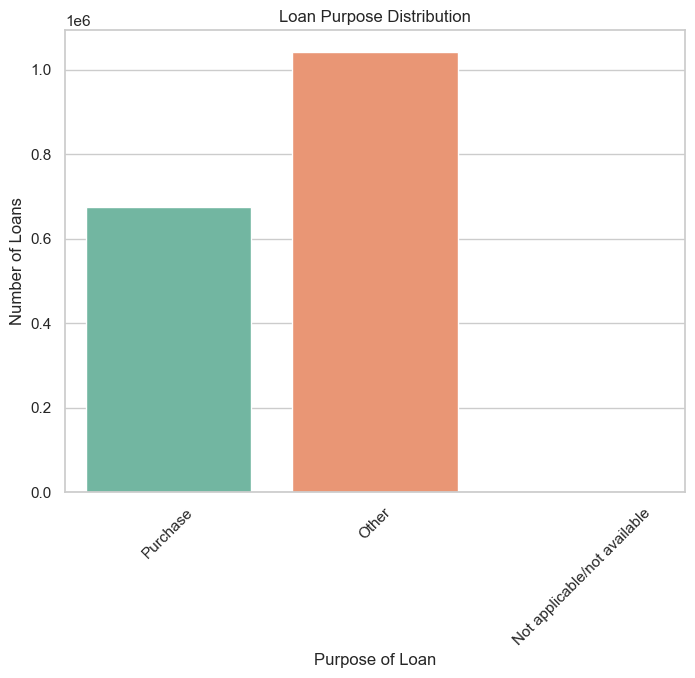

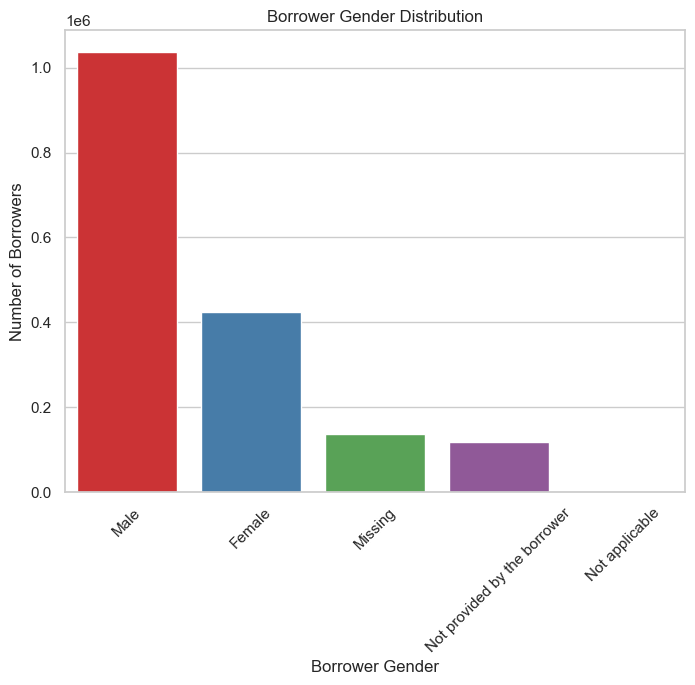

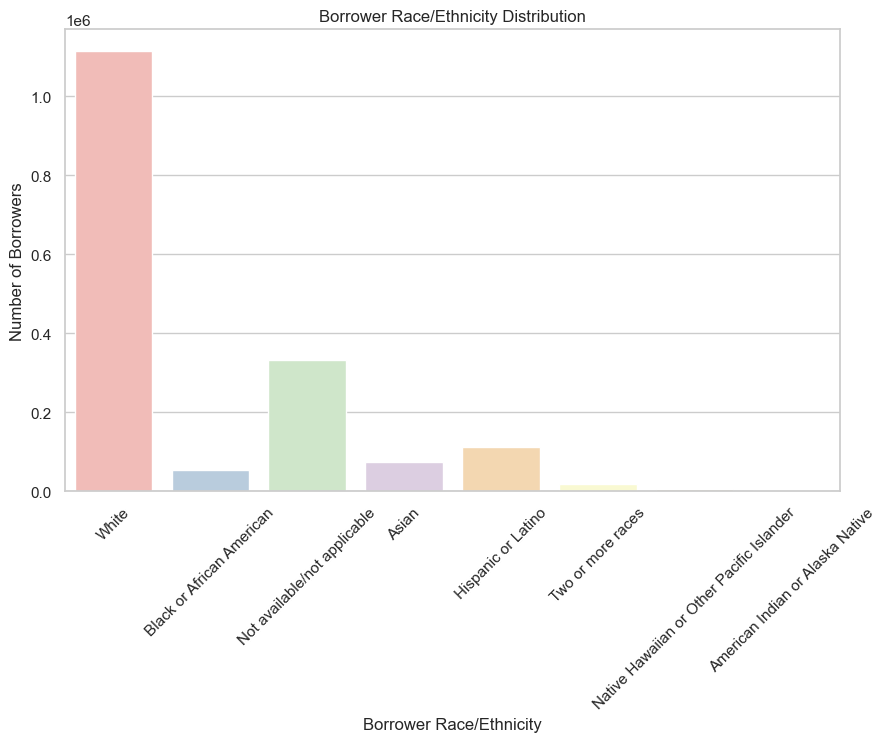

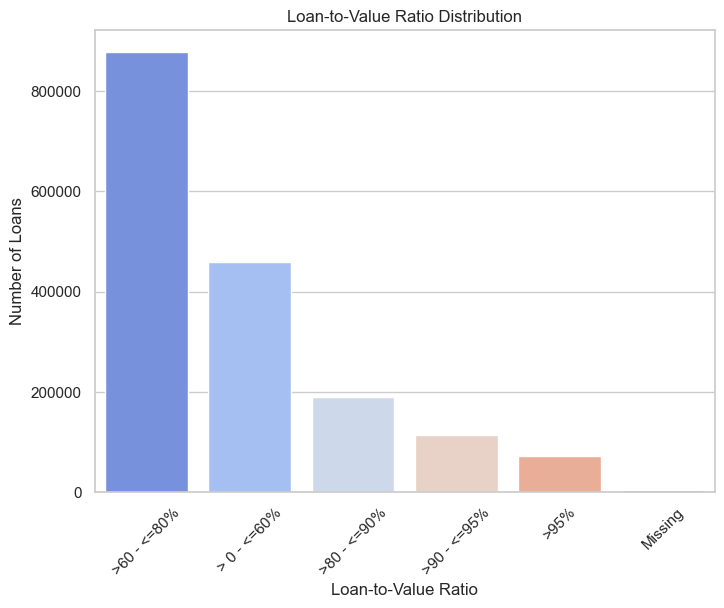

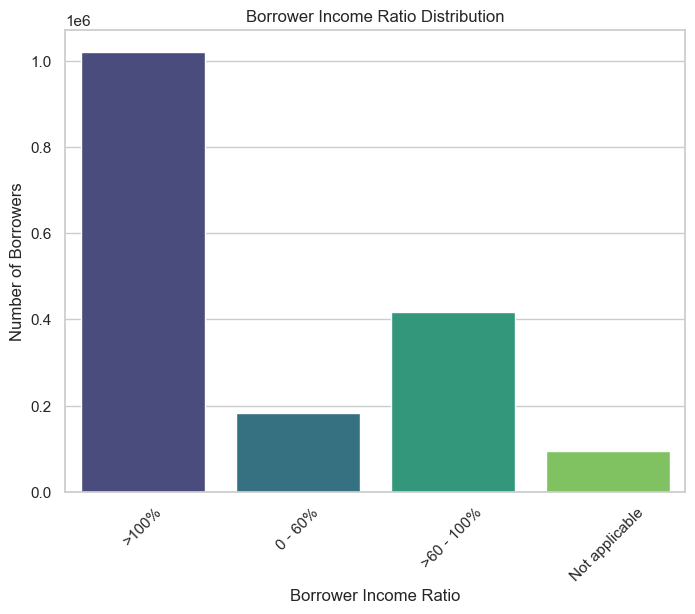

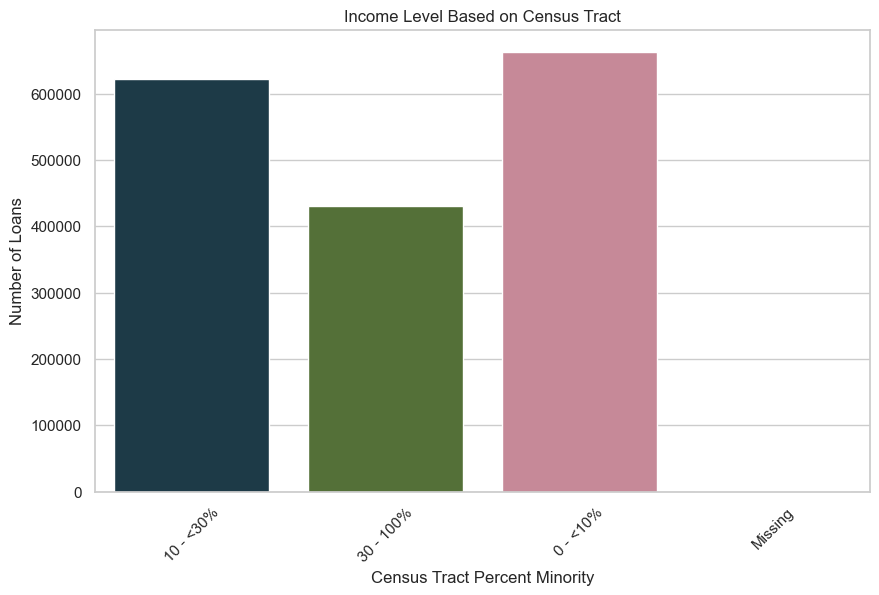

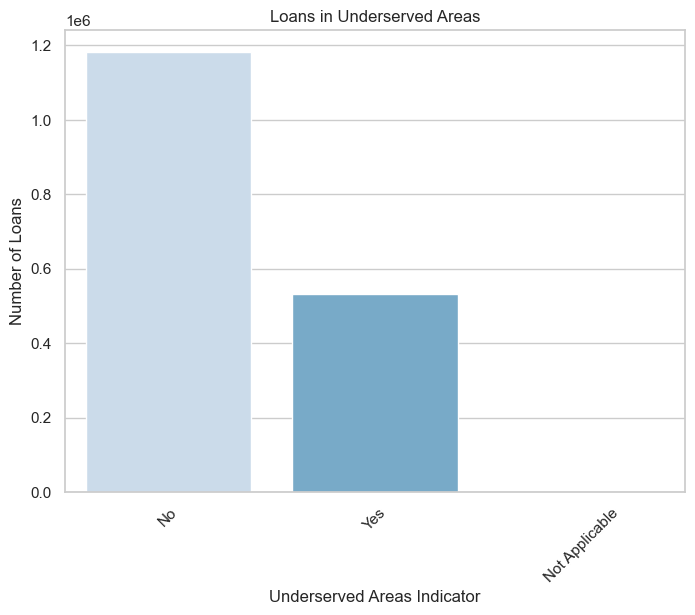

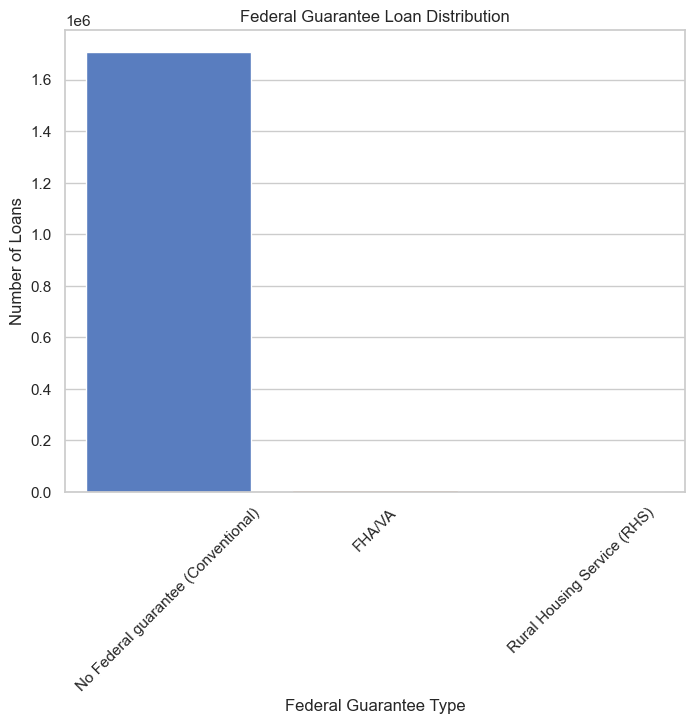

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style for all plots
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# 1. Loan Purpose Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008_mac, x='PurposeOfLoan', palette='Set2')
plt.title("Loan Purpose Distribution")
plt.ylabel("Number of Loans")
plt.xlabel("Purpose of Loan")
plt.xticks(rotation=45)
plt.show()

# 2. Borrower Gender Representation
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008_mac, x='BorrowerGender', palette='Set1')
plt.title("Borrower Gender Distribution")
plt.ylabel("Number of Borrowers")
plt.xlabel("Borrower Gender")
plt.xticks(rotation=45)
plt.show()

# 3. Borrower Race/Ethnicity Breakdown
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2008_mac, x='BorrowerRaceEthnicity', palette='Pastel1')
plt.title("Borrower Race/Ethnicity Distribution")
plt.ylabel("Number of Borrowers")
plt.xlabel("Borrower Race/Ethnicity")
plt.xticks(rotation=45)
plt.show()

# 4. Loan-to-Value Ratio Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008_mac, x='LTV_Ratio', palette='coolwarm')
plt.title("Loan-to-Value Ratio Distribution")
plt.ylabel("Number of Loans")
plt.xlabel("Loan-to-Value Ratio")
plt.xticks(rotation=45)
plt.show()

# 5. Borrower Income Ratio Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008_mac, x='BorrowerIncomeRatio', palette='viridis')
plt.title("Borrower Income Ratio Distribution")
plt.ylabel("Number of Borrowers")
plt.xlabel("Borrower Income Ratio")
plt.xticks(rotation=45)
plt.show()

# 6. Income Level Based on Census Tract
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2008_mac, x='CensusTractPercentMinority', palette='cubehelix')
plt.title("Income Level Based on Census Tract")
plt.ylabel("Number of Loans")
plt.xlabel("Census Tract Percent Minority")
plt.xticks(rotation=45)
plt.show()

# 7. Percentage of Loans in Underserved Areas
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008_mac, x='UnderservedAreasIndicator', palette='Blues')
plt.title("Loans in Underserved Areas")
plt.ylabel("Number of Loans")
plt.xlabel("Underserved Areas Indicator")
plt.xticks(rotation=45)
plt.show()

# 8. Federal Guarantee Loan Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2008_mac, x='FederalGuarantee', palette='muted')
plt.title("Federal Guarantee Loan Distribution")
plt.ylabel("Number of Loans")
plt.xlabel("Federal Guarantee Type")
plt.xticks(rotation=45)
plt.show()
